## Dataset: https://archive.ics.uci.edu/ml/datasets/gas+sensor+array+under+dynamic+gas+mixtures#

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
data_path = "D:/00. FSOFT/01. Project/AIML/02. Gas Leak Detection POC/Source code/Notebook/data/"
co_filename = "ethylene_CO.txt"
methane_filename = "ethylene_methane.txt"

In [3]:
# ethylene methane (EM) data 
# 'ethylene_CO.txt': contains the recordings from the sensors when exposed to mixtures of Ethylene and CO in air.
em_df = pd.read_csv(os.path.join(data_path, methane_filename), skiprows=1, header=None, delim_whitespace=True)
em_df.columns = ['Time', 'Methane_conc', 'Ethylene_conc', 
                 'TGS2602-1', 'TGS2602-2', 'TGS2600-1', 'TGS2600-2', 
                 'TGS2610-1', 'TGS2610-2', 'TGS2620-1', 'TGS2620-2',
                 'TGS2602-3', 'TGS2602-4', 'TGS2600-3', 'TGS2600-4', 
                 'TGS2610-3', 'TGS2610-4', 'TGS2620-3', 'TGS2620-4']
print("Number of samples: ", em_df.shape[0])
em_df.head()

Number of samples:  4178504


Time  Methane_conc  Ethylene_conc  TGS2602-1  TGS2602-2  TGS2600-1  \
0  0.00           0.0            0.0     -41.98    2067.64     -37.13   
1  0.01           0.0            0.0     -46.50    2067.88     -28.56   
2  0.02           0.0            0.0     -36.16    2055.81     -10.89   
3  0.03           0.0            0.0     -50.36    2053.68     -31.96   
4  0.04           0.0            0.0     -37.30    2081.17     -36.16   

   TGS2600-2  TGS2610-1  TGS2610-2  TGS2620-1  TGS2620-2  TGS2602-3  \
0       2.28       8.63     -26.62      -8.46      -0.33    3437.73   
1      13.69     -12.35     -25.81      -5.04      -5.04    3432.44   
2       8.63      -2.93     -30.34      -9.27      -2.12    3438.61   
3      -0.65      -8.29     -21.60       7.98       2.28    3429.51   
4       3.26       5.05     -26.14      -7.48      -0.65    3436.85   

   TGS2602-4  TGS2600-3  TGS2600-4  TGS2610-3  TGS2610-4  TGS2620-3  TGS2620-4  
0    2728.14    4054.03    4007.89    4478.27    5056.98    3639.09    3128.49  
1    2734.47    4038.62    4019.40    4496.72    5051.81    3636.97    3115.03  
2    2719.97    4030.92    4025.48    4489.54    5057.35    3641.81    3105.24  
3    2720.50    4040.22    4000.87    4485.44    5049.60    3642.72    3124.84  
4    2719.71    4029.64    4007.25    4499.12    5057.35    3674.30    3147.59

### Visualize raw data

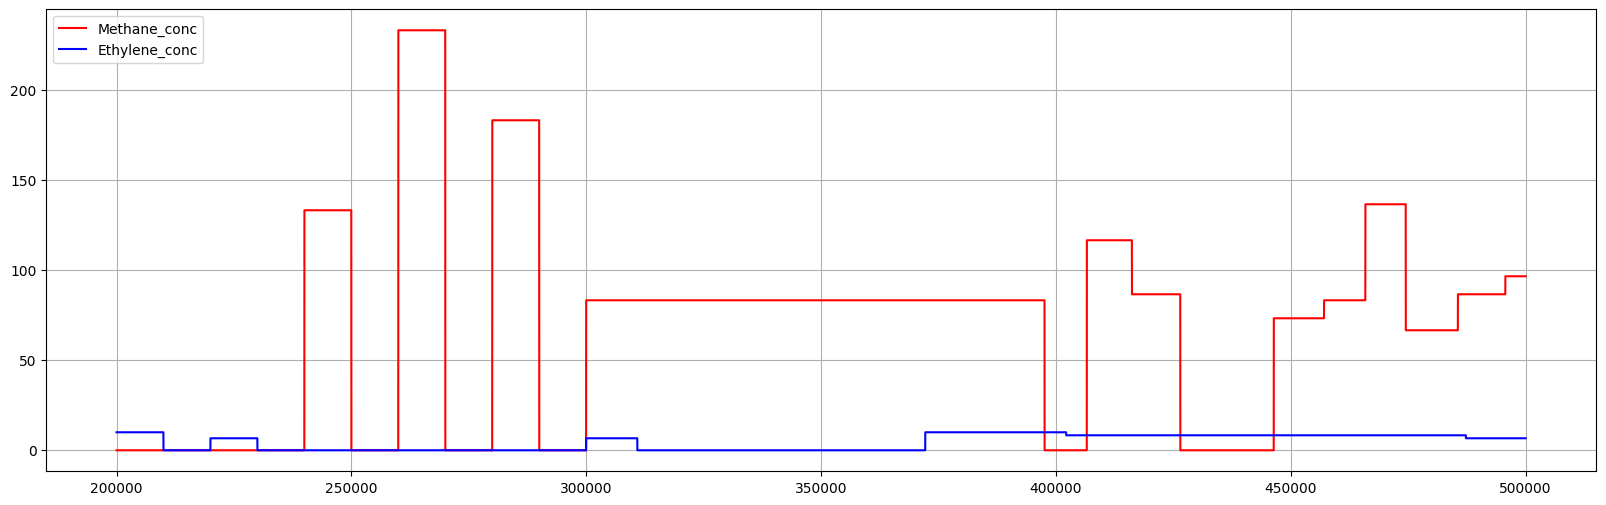

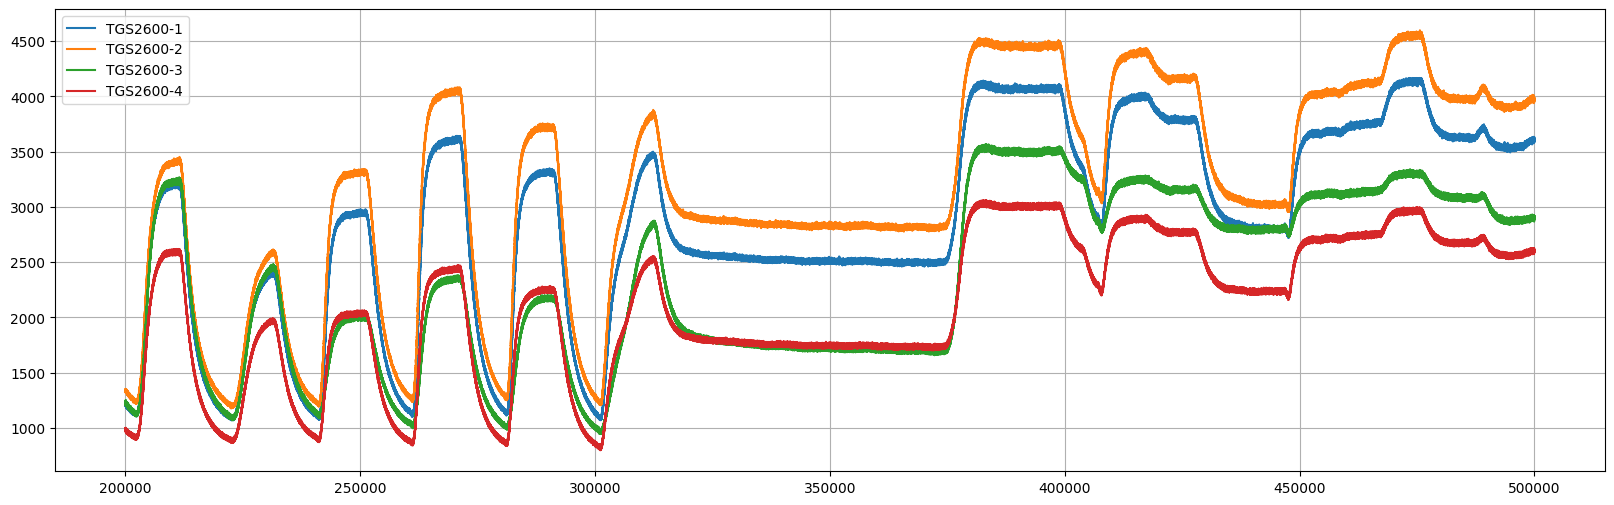

In [4]:
start = 200000
end = 500000


fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='Methane_conc', color='red', ax=ax)
em_df[start:end].plot(y='Ethylene_conc', color='blue', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='TGS2602-1', ax=ax)
em_df[start:end].plot(y='TGS2602-2', ax=ax)
em_df[start:end].plot(y='TGS2602-3', ax=ax)
em_df[start:end].plot(y='TGS2602-4', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='TGS2600-1', ax=ax)
em_df[start:end].plot(y='TGS2600-2', ax=ax)
em_df[start:end].plot(y='TGS2600-3', ax=ax)
em_df[start:end].plot(y='TGS2600-4', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='TGS2610-1', ax=ax)
em_df[start:end].plot(y='TGS2610-2', ax=ax)
em_df[start:end].plot(y='TGS2610-3', ax=ax)
em_df[start:end].plot(y='TGS2610-4', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
em_df[start:end].plot(y='TGS2620-1', ax=ax)
em_df[start:end].plot(y='TGS2620-2', ax=ax)
em_df[start:end].plot(y='TGS2620-3', ax=ax)
em_df[start:end].plot(y='TGS2620-4', ax=ax)
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [55]:
# create timedate index 
processed_df = em_df
processed_df["Time"] = pd.to_timedelta(processed_df["Time"], unit='s')
processed_df = processed_df.set_index('Time')

# min-max normalization
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(processed_df.values)
scaled_df = pd.DataFrame(scaled_df, columns=processed_df.columns)
scaled_df.index = processed_df.index

# downsampling to 1 second interval
scaled_df = scaled_df.resample('1s').mean()

print("Number of samples after normalization: ", scaled_df.shape[0])
scaled_df.head()

Number of samples after normalization:  41791


Methane_conc  Ethylene_conc  TGS2602-1  TGS2602-2  TGS2600-1  \
Time                                                                            
0 days 00:00:00           0.0            0.0   0.003537   0.060225   0.004388   
0 days 00:00:01           0.0            0.0   0.015253   0.060313   0.021894   
0 days 00:00:02           0.0            0.0   0.072100   0.060531   0.083054   
0 days 00:00:03           0.0            0.0   0.182533   0.060588   0.194089   
0 days 00:00:04           0.0            0.0   0.313134   0.060360   0.336924   

                 TGS2600-2  TGS2610-1  TGS2610-2  TGS2620-1  TGS2620-2  \
Time                                                                     
0 days 00:00:00   0.003646   0.004474   0.003894   0.003171   0.004008   
0 days 00:00:01   0.020657   0.022671   0.022033   0.022454   0.024445   
0 days 00:00:02   0.080727   0.094944   0.104740   0.089697   0.096243   
0 days 00:00:03   0.190400   0.251209   0.280799   0.208504   0.223270   
0 days 00:00:04   0.333668   0.462085   0.497149   0.357923   0.384184   

                 TGS2602-3  TGS2602-4  TGS2600-3  TGS2600-4  TGS2610-3  \
Time                                                                     
0 days 00:00:00   0.316854   0.315907   0.804811   0.983190   0.987900   
0 days 00:00:01   0.316719   0.313996   0.804733   0.983904   0.988289   
0 days 00:00:02   0.317078   0.314391   0.804935   0.983568   0.988666   
0 days 00:00:03   0.315925   0.315307   0.805401   0.983759   0.989340   
0 days 00:00:04   0.314577   0.314621   0.804955   0.983521   0.990394   

                 TGS2610-4  TGS2620-3  TGS2620-4  
Time                                              
0 days 00:00:00   0.990329   0.732187   0.800195  
0 days 00:00:01   0.990550   0.731732   0.799344  
0 days 00:00:02   0.990579   0.731897   0.800045  
0 days 00:00:03   0.991888   0.732511   0.800100  
0 days 00:00:04   0.992716   0.732994   0.800905

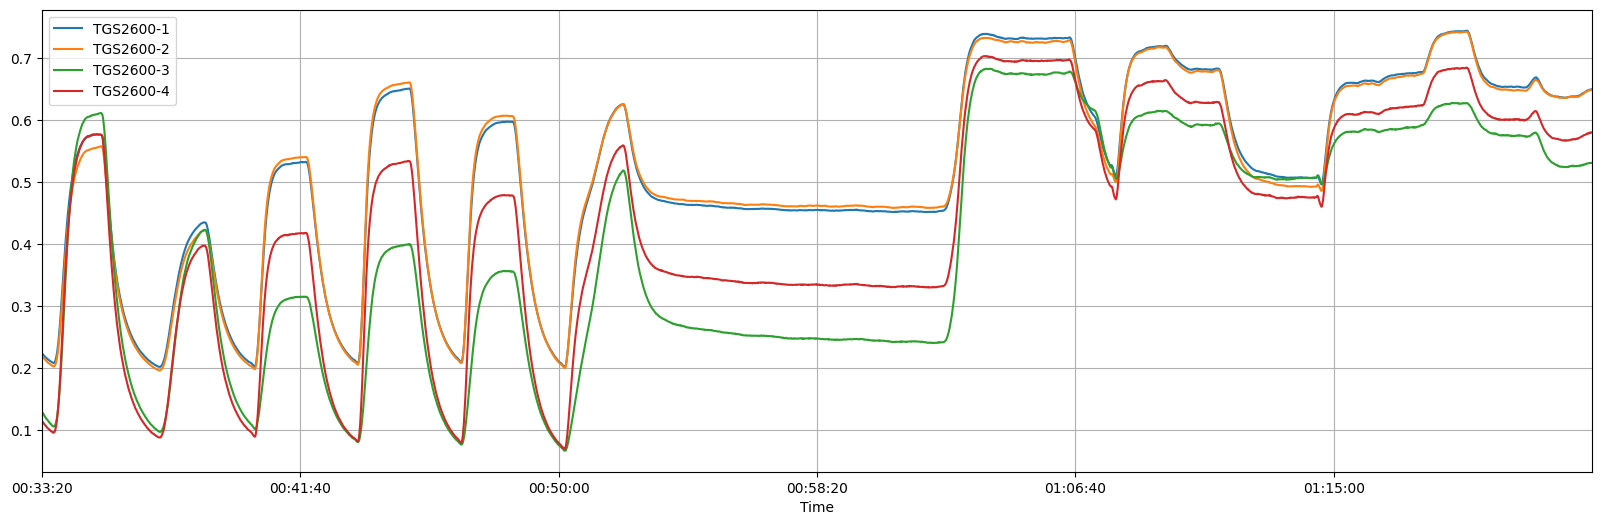

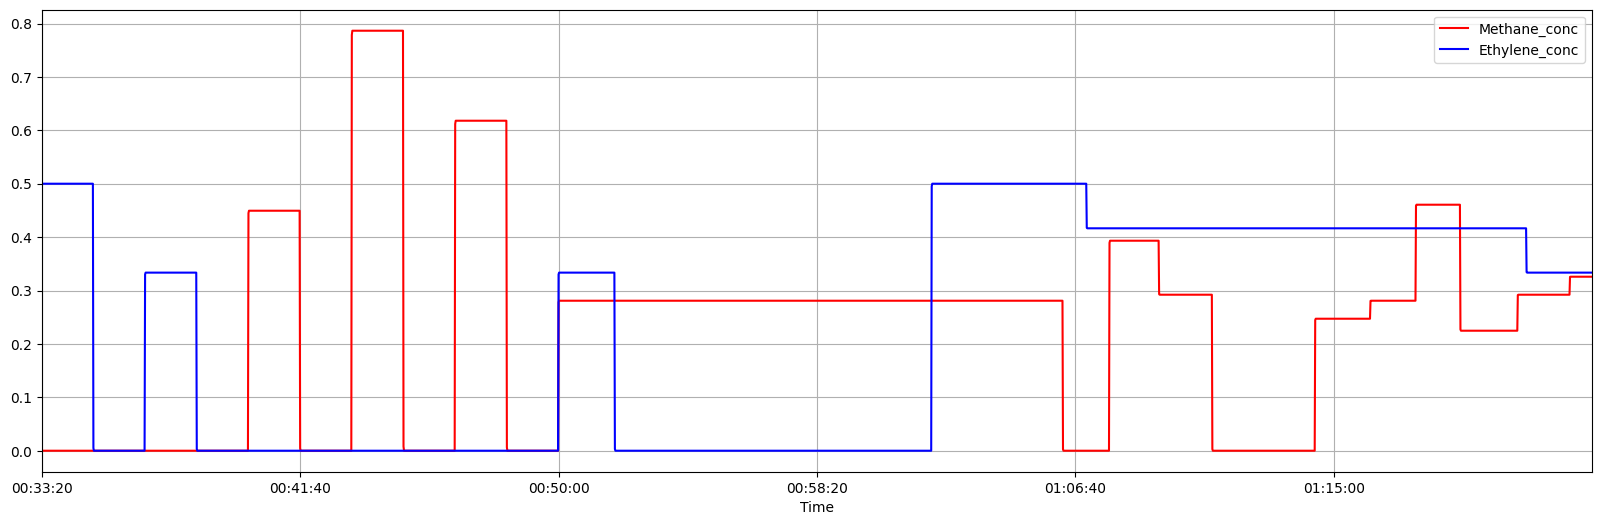

In [57]:
start = 2000
end = 5000


fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='TGS2602-1', ax=ax)
scaled_df[start:end].plot(y='TGS2602-2', ax=ax)
scaled_df[start:end].plot(y='TGS2602-3', ax=ax)
scaled_df[start:end].plot(y='TGS2602-4', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='TGS2600-1', ax=ax)
scaled_df[start:end].plot(y='TGS2600-2', ax=ax)
scaled_df[start:end].plot(y='TGS2600-3', ax=ax)
scaled_df[start:end].plot(y='TGS2600-4', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='TGS2610-1', ax=ax)
scaled_df[start:end].plot(y='TGS2610-2', ax=ax)
scaled_df[start:end].plot(y='TGS2610-3', ax=ax)
scaled_df[start:end].plot(y='TGS2610-4', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='TGS2620-1', ax=ax)
scaled_df[start:end].plot(y='TGS2620-2', ax=ax)
scaled_df[start:end].plot(y='TGS2620-3', ax=ax)
scaled_df[start:end].plot(y='TGS2620-4', ax=ax)
plt.grid()
plt.show()

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
scaled_df[start:end].plot(y='Methane_conc', color='red', ax=ax)
scaled_df[start:end].plot(y='Ethylene_conc', color='blue', ax=ax)
plt.grid()
plt.show()

In [59]:
scaled_df['Label'] = 0

In [8]:
scaled_df.head()

Methane_conc  Ethylene_conc  TGS2602-1  TGS2602-2  TGS2600-1  \
Time                                                                            
0 days 00:00:00           0.0            0.0   0.339637   0.060391   0.435042   
0 days 00:00:10           0.0            0.0   0.741987   0.059962   0.967936   
0 days 00:00:20           0.0            0.0   0.747490   0.058871   0.815642   
0 days 00:00:30           0.0            0.0   0.729775   0.057809   0.629475   
0 days 00:00:40           0.0            0.0   0.710372   0.056787   0.494844   

                 TGS2600-2  TGS2610-1  TGS2610-2  TGS2620-1  TGS2620-2  \
Time                                                                     
0 days 00:00:00   0.435135   0.511181   0.498301   0.432443   0.460782   
0 days 00:00:10   0.967795   0.960037   0.933427   0.853896   0.884382   
0 days 00:00:20   0.814185   0.743564   0.730451   0.701129   0.705304   
0 days 00:00:30   0.626960   0.503826   0.493271   0.521788   0.514185   
0 days 00:00:40   0.491047   0.372685   0.363990   0.414771   0.406574   

                 TGS2602-3  TGS2602-4  TGS2600-3  TGS2600-4  TGS2610-3  \
Time                                                                     
0 days 00:00:00   0.316347   0.314575   0.800928   0.978773   0.981738   
0 days 00:00:10   0.337800   0.337290   0.745586   0.914576   0.942582   
0 days 00:00:20   0.376451   0.380658   0.638549   0.775039   0.650297   
0 days 00:00:30   0.380876   0.396247   0.486890   0.570589   0.400419   
0 days 00:00:40   0.353459   0.376962   0.366393   0.416752   0.268932   

                 TGS2610-4  TGS2620-3  TGS2620-4  Label  
Time                                                     
0 days 00:00:00   0.985838   0.728225   0.797471      0  
0 days 00:00:10   0.949830   0.678306   0.756541      0  
0 days 00:00:20   0.673701   0.546274   0.609772      0  
0 days 00:00:30   0.410875   0.385965   0.420793      0  
0 days 00:00:40   0.271548   0.287924   0.305378      0

In [9]:
scaled_df.columns 

Index(['Methane_conc', 'Ethylene_conc', 'TGS2602-1', 'TGS2602-2', 'TGS2600-1',
       'TGS2600-2', 'TGS2610-1', 'TGS2610-2', 'TGS2620-1', 'TGS2620-2',
       'TGS2602-3', 'TGS2602-4', 'TGS2600-3', 'TGS2600-4', 'TGS2610-3',
       'TGS2610-4', 'TGS2620-3', 'TGS2620-4', 'Label'],
      dtype='object')

In [10]:
#  Label = 0,1,2,3 => air(0) ~ Methane_conc = 0 & Ethylene_conc =0
#                     Methane(1) ~ Methan >0, Ethy =0
#                     Ethane(2) ~ ethan >0, Methy =0
#                     Mix(3) ~ ethan >0, Methy =>

## Create Lable column for classification 

In [60]:
df_new = scaled_df.filter(['Methane_conc', 'Ethylene_conc','Label'], axis=1)
df_new

Methane_conc  Ethylene_conc  Label
Time                                               
0 days 00:00:00           0.0            0.0      0
0 days 00:00:01           0.0            0.0      0
0 days 00:00:02           0.0            0.0      0
0 days 00:00:03           0.0            0.0      0
0 days 00:00:04           0.0            0.0      0
...                       ...            ...    ...
0 days 11:36:26           0.0            0.0      0
0 days 11:36:27           0.0            0.0      0
0 days 11:36:28           0.0            0.0      0
0 days 11:36:29           0.0            0.0      0
0 days 11:36:30           0.0            0.0      0

[41791 rows x 3 columns]

In [12]:
 df_new['Methane_conc'].values 

array([0., 0., 0., ..., 0., 0., 0.])

In [61]:
conditions = [
    (df_new['Methane_conc'] == 0) & (df_new['Ethylene_conc'] == 0) ,
    (df_new['Methane_conc'] > 0) & (df_new['Ethylene_conc'] == 0),
    (df_new['Methane_conc'] == 0) & (df_new['Ethylene_conc'] > 0),
    (df_new['Methane_conc'] > 0) & (df_new['Ethylene_conc'] > 0),
    ]

labels = [0,1,2,3]
   
df_new['Label'] = np.select(conditions, labels, default= 0)

In [62]:
df_new.Label.value_counts()

0    13650
1    10045
2     9571
3     8525
Name: Label, dtype: int64

In [63]:
df_label = df_new.Label
df_label 

Time
0 days 00:00:00    0
0 days 00:00:01    0
0 days 00:00:02    0
0 days 00:00:03    0
0 days 00:00:04    0
                  ..
0 days 11:36:26    0
0 days 11:36:27    0
0 days 11:36:28    0
0 days 11:36:29    0
0 days 11:36:30    0
Freq: S, Name: Label, Length: 41791, dtype: int32

In [64]:
df_label.to_csv('label_data.csv')

In [17]:
#Test -Write funtion & apply lampda

In [18]:
# def CalDiscrete(value, open):
#     # Alot = >1%
#     # Normal = 0.2% ~ 1%
#     # Alittle = 0.01% ~ 0.2%
#     # Flat = 0% ~ 0.01%
#     if(value >= open*0.01):
#         return 'up_alot'
#     elif(value <= open*-0.01):
#         return 'down_alot'
#     elif(value >= open*0.002):
#         return 'up'
#     elif(value <= open*-0.002):
#         return 'down'
#     elif(value >= open*0.0001):
#         return 'up_alittle'
#     elif(value <= open*-0.0001):
#         return 'down_alittle'
#     else:
#         return 'flat'

In [19]:
# df_input['movement'] = df_input["close"].diff()
# df_input['discrete'] = df_input.apply(lambda row: CalDiscrete(row['movement'], row["close"]), axis=1) 

In [20]:
df_json = em_df.head(100).to_json('jd1')


## MODELING

In [65]:
scaled_df

Methane_conc  Ethylene_conc  TGS2602-1  TGS2602-2  TGS2600-1  \
Time                                                                            
0 days 00:00:00           0.0            0.0   0.003537   0.060225   0.004388   
0 days 00:00:01           0.0            0.0   0.015253   0.060313   0.021894   
0 days 00:00:02           0.0            0.0   0.072100   0.060531   0.083054   
0 days 00:00:03           0.0            0.0   0.182533   0.060588   0.194089   
0 days 00:00:04           0.0            0.0   0.313134   0.060360   0.336924   
...                       ...            ...        ...        ...        ...   
0 days 11:36:26           0.0            0.0   0.705209   0.004029   0.235281   
0 days 11:36:27           0.0            0.0   0.702725   0.003879   0.237738   
0 days 11:36:28           0.0            0.0   0.699790   0.003861   0.240817   
0 days 11:36:29           0.0            0.0   0.696375   0.003719   0.243902   
0 days 11:36:30           0.0            0.0   0.695201   0.003981   0.245951   

                 TGS2600-2  TGS2610-1  TGS2610-2  TGS2620-1  TGS2620-2  \
Time                                                                     
0 days 00:00:00   0.003646   0.004474   0.003894   0.003171   0.004008   
0 days 00:00:01   0.020657   0.022671   0.022033   0.022454   0.024445   
0 days 00:00:02   0.080727   0.094944   0.104740   0.089697   0.096243   
0 days 00:00:03   0.190400   0.251209   0.280799   0.208504   0.223270   
0 days 00:00:04   0.333668   0.462085   0.497149   0.357923   0.384184   
...                    ...        ...        ...        ...        ...   
0 days 11:36:26   0.231714   0.209677   0.220941   0.235605   0.238492   
0 days 11:36:27   0.233858   0.216194   0.229861   0.240045   0.244218   
0 days 11:36:28   0.236918   0.223562   0.239158   0.245409   0.249878   
0 days 11:36:29   0.240150   0.230576   0.248380   0.251009   0.256113   
0 days 11:36:30   0.241635   0.234585   0.253728   0.254237   0.259932   

                 TGS2602-3  TGS2602-4  TGS2600-3  TGS2600-4  TGS2610-3  \
Time                                                                     
0 days 00:00:00   0.316854   0.315907   0.804811   0.983190   0.987900   
0 days 00:00:01   0.316719   0.313996   0.804733   0.983904   0.988289   
0 days 00:00:02   0.317078   0.314391   0.804935   0.983568   0.988666   
0 days 00:00:03   0.315925   0.315307   0.805401   0.983759   0.989340   
0 days 00:00:04   0.314577   0.314621   0.804955   0.983521   0.990394   
...                    ...        ...        ...        ...        ...   
0 days 11:36:26   0.243525   0.261376   0.098662   0.100732   0.103058   
0 days 11:36:27   0.234681   0.252921   0.102079   0.104314   0.110756   
0 days 11:36:28   0.227571   0.245878   0.104746   0.107608   0.118122   
0 days 11:36:29   0.220235   0.235924   0.108323   0.111706   0.125581   
0 days 11:36:30   0.216625   0.227865   0.110570   0.114212   0.129870   

                 TGS2610-4  TGS2620-3  TGS2620-4  Label  
Time                                                     
0 days 00:00:00   0.990329   0.732187   0.800195      0  
0 days 00:00:01   0.990550   0.731732   0.799344      0  
0 days 00:00:02   0.990579   0.731897   0.800045      0  
0 days 00:00:03   0.991888   0.732511   0.800100      0  
0 days 00:00:04   0.992716   0.732994   0.800905      0  
...                    ...        ...        ...    ...  
0 days 11:36:26   0.089794   0.090858   0.089040      0  
0 days 11:36:27   0.094675   0.095738   0.093919      0  
0 days 11:36:28   0.100575   0.101811   0.099553      0  
0 days 11:36:29   0.106161   0.107249   0.104798      0  
0 days 11:36:30   0.109827   0.111447   0.108946      0  

[41791 rows x 19 columns]

In [66]:
X = scaled_df.copy()
X

Methane_conc  Ethylene_conc  TGS2602-1  TGS2602-2  TGS2600-1  \
Time                                                                            
0 days 00:00:00           0.0            0.0   0.003537   0.060225   0.004388   
0 days 00:00:01           0.0            0.0   0.015253   0.060313   0.021894   
0 days 00:00:02           0.0            0.0   0.072100   0.060531   0.083054   
0 days 00:00:03           0.0            0.0   0.182533   0.060588   0.194089   
0 days 00:00:04           0.0            0.0   0.313134   0.060360   0.336924   
...                       ...            ...        ...        ...        ...   
0 days 11:36:26           0.0            0.0   0.705209   0.004029   0.235281   
0 days 11:36:27           0.0            0.0   0.702725   0.003879   0.237738   
0 days 11:36:28           0.0            0.0   0.699790   0.003861   0.240817   
0 days 11:36:29           0.0            0.0   0.696375   0.003719   0.243902   
0 days 11:36:30           0.0            0.0   0.695201   0.003981   0.245951   

                 TGS2600-2  TGS2610-1  TGS2610-2  TGS2620-1  TGS2620-2  \
Time                                                                     
0 days 00:00:00   0.003646   0.004474   0.003894   0.003171   0.004008   
0 days 00:00:01   0.020657   0.022671   0.022033   0.022454   0.024445   
0 days 00:00:02   0.080727   0.094944   0.104740   0.089697   0.096243   
0 days 00:00:03   0.190400   0.251209   0.280799   0.208504   0.223270   
0 days 00:00:04   0.333668   0.462085   0.497149   0.357923   0.384184   
...                    ...        ...        ...        ...        ...   
0 days 11:36:26   0.231714   0.209677   0.220941   0.235605   0.238492   
0 days 11:36:27   0.233858   0.216194   0.229861   0.240045   0.244218   
0 days 11:36:28   0.236918   0.223562   0.239158   0.245409   0.249878   
0 days 11:36:29   0.240150   0.230576   0.248380   0.251009   0.256113   
0 days 11:36:30   0.241635   0.234585   0.253728   0.254237   0.259932   

                 TGS2602-3  TGS2602-4  TGS2600-3  TGS2600-4  TGS2610-3  \
Time                                                                     
0 days 00:00:00   0.316854   0.315907   0.804811   0.983190   0.987900   
0 days 00:00:01   0.316719   0.313996   0.804733   0.983904   0.988289   
0 days 00:00:02   0.317078   0.314391   0.804935   0.983568   0.988666   
0 days 00:00:03   0.315925   0.315307   0.805401   0.983759   0.989340   
0 days 00:00:04   0.314577   0.314621   0.804955   0.983521   0.990394   
...                    ...        ...        ...        ...        ...   
0 days 11:36:26   0.243525   0.261376   0.098662   0.100732   0.103058   
0 days 11:36:27   0.234681   0.252921   0.102079   0.104314   0.110756   
0 days 11:36:28   0.227571   0.245878   0.104746   0.107608   0.118122   
0 days 11:36:29   0.220235   0.235924   0.108323   0.111706   0.125581   
0 days 11:36:30   0.216625   0.227865   0.110570   0.114212   0.129870   

                 TGS2610-4  TGS2620-3  TGS2620-4  Label  
Time                                                     
0 days 00:00:00   0.990329   0.732187   0.800195      0  
0 days 00:00:01   0.990550   0.731732   0.799344      0  
0 days 00:00:02   0.990579   0.731897   0.800045      0  
0 days 00:00:03   0.991888   0.732511   0.800100      0  
0 days 00:00:04   0.992716   0.732994   0.800905      0  
...                    ...        ...        ...    ...  
0 days 11:36:26   0.089794   0.090858   0.089040      0  
0 days 11:36:27   0.094675   0.095738   0.093919      0  
0 days 11:36:28   0.100575   0.101811   0.099553      0  
0 days 11:36:29   0.106161   0.107249   0.104798      0  
0 days 11:36:30   0.109827   0.111447   0.108946      0  

[41791 rows x 19 columns]

In [67]:
X.drop(['Methane_conc', 'Ethylene_conc', 'Label'], axis=1, inplace=True)

In [68]:
X

TGS2602-1  TGS2602-2  TGS2600-1  TGS2600-2  TGS2610-1  \
Time                                                                     
0 days 00:00:00   0.003537   0.060225   0.004388   0.003646   0.004474   
0 days 00:00:01   0.015253   0.060313   0.021894   0.020657   0.022671   
0 days 00:00:02   0.072100   0.060531   0.083054   0.080727   0.094944   
0 days 00:00:03   0.182533   0.060588   0.194089   0.190400   0.251209   
0 days 00:00:04   0.313134   0.060360   0.336924   0.333668   0.462085   
...                    ...        ...        ...        ...        ...   
0 days 11:36:26   0.705209   0.004029   0.235281   0.231714   0.209677   
0 days 11:36:27   0.702725   0.003879   0.237738   0.233858   0.216194   
0 days 11:36:28   0.699790   0.003861   0.240817   0.236918   0.223562   
0 days 11:36:29   0.696375   0.003719   0.243902   0.240150   0.230576   
0 days 11:36:30   0.695201   0.003981   0.245951   0.241635   0.234585   

                 TGS2610-2  TGS2620-1  TGS2620-2  TGS2602-3  TGS2602-4  \
Time                                                                     
0 days 00:00:00   0.003894   0.003171   0.004008   0.316854   0.315907   
0 days 00:00:01   0.022033   0.022454   0.024445   0.316719   0.313996   
0 days 00:00:02   0.104740   0.089697   0.096243   0.317078   0.314391   
0 days 00:00:03   0.280799   0.208504   0.223270   0.315925   0.315307   
0 days 00:00:04   0.497149   0.357923   0.384184   0.314577   0.314621   
...                    ...        ...        ...        ...        ...   
0 days 11:36:26   0.220941   0.235605   0.238492   0.243525   0.261376   
0 days 11:36:27   0.229861   0.240045   0.244218   0.234681   0.252921   
0 days 11:36:28   0.239158   0.245409   0.249878   0.227571   0.245878   
0 days 11:36:29   0.248380   0.251009   0.256113   0.220235   0.235924   
0 days 11:36:30   0.253728   0.254237   0.259932   0.216625   0.227865   

                 TGS2600-3  TGS2600-4  TGS2610-3  TGS2610-4  TGS2620-3  \
Time                                                                     
0 days 00:00:00   0.804811   0.983190   0.987900   0.990329   0.732187   
0 days 00:00:01   0.804733   0.983904   0.988289   0.990550   0.731732   
0 days 00:00:02   0.804935   0.983568   0.988666   0.990579   0.731897   
0 days 00:00:03   0.805401   0.983759   0.989340   0.991888   0.732511   
0 days 00:00:04   0.804955   0.983521   0.990394   0.992716   0.732994   
...                    ...        ...        ...        ...        ...   
0 days 11:36:26   0.098662   0.100732   0.103058   0.089794   0.090858   
0 days 11:36:27   0.102079   0.104314   0.110756   0.094675   0.095738   
0 days 11:36:28   0.104746   0.107608   0.118122   0.100575   0.101811   
0 days 11:36:29   0.108323   0.111706   0.125581   0.106161   0.107249   
0 days 11:36:30   0.110570   0.114212   0.129870   0.109827   0.111447   

                 TGS2620-4  
Time                        
0 days 00:00:00   0.800195  
0 days 00:00:01   0.799344  
0 days 00:00:02   0.800045  
0 days 00:00:03   0.800100  
0 days 00:00:04   0.800905  
...                    ...  
0 days 11:36:26   0.089040  
0 days 11:36:27   0.093919  
0 days 11:36:28   0.099553  
0 days 11:36:29   0.104798  
0 days 11:36:30   0.108946  

[41791 rows x 16 columns]

In [69]:
y = df_new['Label']
y.head()
             

Time
0 days 00:00:00    0
0 days 00:00:01    0
0 days 00:00:02    0
0 days 00:00:03    0
0 days 00:00:04    0
Freq: S, Name: Label, dtype: int32

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
X_train.head()

TGS2602-1  TGS2602-2  TGS2600-1  TGS2600-2  TGS2610-1  \
Time                                                                     
0 days 11:06:10   0.717058   0.004094   0.585198   0.590556   0.691868   
0 days 00:27:00   0.618242   0.037997   0.507418   0.515471   0.508367   
0 days 06:08:30   0.789762   0.020725   0.656873   0.654517   0.634285   
0 days 04:10:10   0.728913   0.018505   0.257941   0.253005   0.143741   
0 days 06:21:40   0.959347   0.018577   0.767863   0.745575   0.281114   

                 TGS2610-2  TGS2620-1  TGS2620-2  TGS2602-3  TGS2602-4  \
Time                                                                     
0 days 11:06:10   0.708414   0.554628   0.588488   0.346301   0.354173   
0 days 00:27:00   0.496045   0.447748   0.461849   0.091215   0.094953   
0 days 06:08:30   0.624170   0.666143   0.678865   0.490676   0.487570   
0 days 04:10:10   0.156756   0.266577   0.254932   0.392742   0.415813   
0 days 06:21:40   0.254002   0.827009   0.797994   0.900921   0.901260   

                 TGS2600-3  TGS2600-4  TGS2610-3  TGS2610-4  TGS2620-3  \
Time                                                                     
0 days 11:06:10   0.353982   0.455291   0.571796   0.546177   0.340792   
0 days 00:27:00   0.307203   0.388697   0.366492   0.353531   0.257078   
0 days 06:08:30   0.538462   0.582319   0.511161   0.495047   0.551454   
0 days 04:10:10   0.175200   0.151669   0.033786   0.033671   0.163395   
0 days 06:21:40   0.865318   0.805090   0.161431   0.162618   0.884787   

                 TGS2620-4  
Time                        
0 days 11:06:10   0.391437  
0 days 00:27:00   0.292737  
0 days 06:08:30   0.565543  
0 days 04:10:10   0.150611  
0 days 06:21:40   0.851328

In [29]:
y_test.value_counts()

0    372
1    304
2    302
3    276
Name: Label, dtype: int64

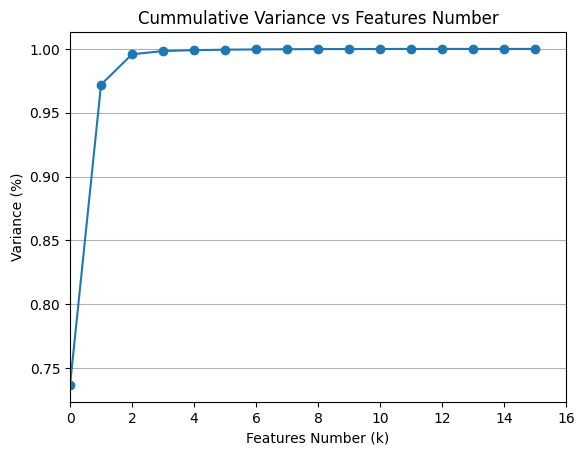

In [71]:
pca = PCA().fit(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o')
plt.xlabel('Features Number (k)')
plt.ylabel('Variance (%)')
plt.title('Cummulative Variance vs Features Number')
plt.xlim([0, 16])
plt.grid(axis = 'y')
plt.show()

In [31]:
scaled_df.Label 

Time
0 days 00:00:00    0
0 days 00:00:10    0
0 days 00:00:20    0
0 days 00:00:30    0
0 days 00:00:40    0
                  ..
0 days 11:35:50    0
0 days 11:36:00    0
0 days 11:36:10    0
0 days 11:36:20    0
0 days 11:36:30    0
Freq: 10S, Name: Label, Length: 4180, dtype: int64

In [72]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df_new['Label'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
y_train 

Time
0 days 11:06:10    1
0 days 00:27:00    0
0 days 06:08:30    3
0 days 04:10:10    0
0 days 06:21:40    2
                  ..
0 days 09:34:00    3
0 days 01:17:40    3
0 days 08:35:20    0
0 days 10:28:40    3
0 days 02:23:20    0
Name: Label, Length: 2926, dtype: int32

In [35]:
X_train

TGS2602-1  TGS2602-2  TGS2600-1  TGS2600-2  TGS2610-1  \
Time                                                                     
0 days 11:06:10   0.717058   0.004094   0.585198   0.590556   0.691868   
0 days 00:27:00   0.618242   0.037997   0.507418   0.515471   0.508367   
0 days 06:08:30   0.789762   0.020725   0.656873   0.654517   0.634285   
0 days 04:10:10   0.728913   0.018505   0.257941   0.253005   0.143741   
0 days 06:21:40   0.959347   0.018577   0.767863   0.745575   0.281114   
...                    ...        ...        ...        ...        ...   
0 days 09:34:00   0.750961   0.005749   0.645873   0.646873   0.652121   
0 days 01:17:40   0.792220   0.026293   0.677656   0.673945   0.599717   
0 days 08:35:20   0.701013   0.008951   0.188424   0.185642   0.142774   
0 days 10:28:40   0.843507   0.004879   0.725097   0.715971   0.618448   
0 days 02:23:20   0.665770   0.016791   0.556735   0.564630   0.631066   

                 TGS2610-2  TGS2620-1  TGS2620-2  TGS2602-3  TGS2602-4  \
Time                                                                     
0 days 11:06:10   0.708414   0.554628   0.588488   0.346301   0.354173   
0 days 00:27:00   0.496045   0.447748   0.461849   0.091215   0.094953   
0 days 06:08:30   0.624170   0.666143   0.678865   0.490676   0.487570   
0 days 04:10:10   0.156756   0.266577   0.254932   0.392742   0.415813   
0 days 06:21:40   0.254002   0.827009   0.797994   0.900921   0.901260   
...                    ...        ...        ...        ...        ...   
0 days 09:34:00   0.662284   0.690646   0.709490   0.416636   0.417968   
0 days 01:17:40   0.581548   0.689431   0.695171   0.499120   0.490247   
0 days 08:35:20   0.158299   0.204887   0.200042   0.278098   0.300189   
0 days 10:28:40   0.595461   0.751489   0.758697   0.577916   0.568120   
0 days 02:23:20   0.619110   0.522886   0.549631   0.239476   0.241516   

                 TGS2600-3  TGS2600-4  TGS2610-3  TGS2610-4  TGS2620-3  \
Time                                                                     
0 days 11:06:10   0.353982   0.455291   0.571796   0.546177   0.340792   
0 days 00:27:00   0.307203   0.388697   0.366492   0.353531   0.257078   
0 days 06:08:30   0.538462   0.582319   0.511161   0.495047   0.551454   
0 days 04:10:10   0.175200   0.151669   0.033786   0.033671   0.163395   
0 days 06:21:40   0.865318   0.805090   0.161431   0.162618   0.884787   
...                    ...        ...        ...        ...        ...   
0 days 09:34:00   0.473660   0.575132   0.534518   0.515477   0.569018   
0 days 01:17:40   0.590426   0.623861   0.470910   0.458809   0.600457   
0 days 08:35:20   0.061327   0.060239   0.034987   0.031025   0.067370   
0 days 10:28:40   0.633550   0.669493   0.493403   0.478803   0.683814   
0 days 02:23:20   0.328690   0.433041   0.487054   0.482492   0.309416   

                 TGS2620-4  
Time                        
0 days 11:06:10   0.391437  
0 days 00:27:00   0.292737  
0 days 06:08:30   0.565543  
0 days 04:10:10   0.150611  
0 days 06:21:40   0.851328  
...                    ...  
0 days 09:34:00   0.589006  
0 days 01:17:40   0.605278  
0 days 08:35:20   0.065001  
0 days 10:28:40   0.685906  
0 days 02:23:20   0.358726  

[2926 rows x 16 columns]

In [36]:
y_train

Time
0 days 11:06:10    1
0 days 00:27:00    0
0 days 06:08:30    3
0 days 04:10:10    0
0 days 06:21:40    2
                  ..
0 days 09:34:00    3
0 days 01:17:40    3
0 days 08:35:20    0
0 days 10:28:40    3
0 days 02:23:20    0
Name: Label, Length: 2926, dtype: int32

In [37]:
y_train

Time
0 days 11:06:10    1
0 days 00:27:00    0
0 days 06:08:30    3
0 days 04:10:10    0
0 days 06:21:40    2
                  ..
0 days 09:34:00    3
0 days 01:17:40    3
0 days 08:35:20    0
0 days 10:28:40    3
0 days 02:23:20    0
Name: Label, Length: 2926, dtype: int32

## Random Forest Algorithm

In [81]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 10)
model = clf.fit(X_train,y_train)

In [82]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 3, ..., 1, 0, 1])

In [83]:
target_names = ['Air', 'Methane', 'Ethane', 'Mixture']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Air       0.97      0.98      0.98      4066
     Methane       0.98      0.98      0.98      3003
      Ethane       0.98      0.96      0.97      2900
     Mixture       0.99      0.98      0.98      2569

    accuracy                           0.98     12538
   macro avg       0.98      0.98      0.98     12538
weighted avg       0.98      0.98      0.98     12538



In [76]:
#Confusion Matrix
import seaborn as sns 
cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 12},cmap='Blues',fmt="d",xticklabels=target_names,yticklabels=target_names)

plt.show()

## SVM Algorithm

In [42]:
from sklearn import svm

In [77]:
clf_svm = svm.SVC()
model_svm = clf_svm.fit(X_train,y_train) 

In [78]:
y_pred_svm = model_svm.predict(X_test)
y_pred_svm 

array([0, 1, 3, ..., 1, 0, 1])

In [79]:
target_names = ['Air', 'Methane', 'Ethane', 'Mixture']
print(classification_report(y_test, y_pred_svm, target_names=target_names))

              precision    recall  f1-score   support

         Air       0.84      0.87      0.85      4066
     Methane       0.85      0.87      0.86      3003
      Ethane       0.86      0.80      0.83      2900
     Mixture       0.89      0.87      0.88      2569

    accuracy                           0.85     12538
   macro avg       0.86      0.85      0.86     12538
weighted avg       0.86      0.85      0.85     12538



In [80]:
#Confusion Matrix
import seaborn as sns 
cf_matrix = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 12},cmap='Blues',fmt="d",xticklabels=target_names,yticklabels=target_names)
plt.title('SVM Model Confusion Matrix Result')
plt.show()

## Model Comparison

In [48]:
from sklearn.model_selection import cross_val_score
models =[
    RandomForestClassifier(n_estimators=100),
    SVC(kernel='linear')
]
CV =5
cv_df = pd.DataFrame(index =range(len(models)))
entries =[]
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model,X_test,y_test,scoring = 'accuracy', cv= CV)
    print(accuracies)
    entries.append([model_name,accuracies.mean()])



[0.84860558 0.84462151 0.82868526 0.8685259  0.86      ]
[0.80478088 0.82071713 0.81673307 0.85258964 0.844     ]


In [51]:
cv_df = pd.DataFrame(entries, columns = ['model_name', 'accuracies'])
cv_df
            

model_name  accuracies
0  RandomForestClassifier    0.850088
1                     SVC    0.827764

Text(0.5, 1.0, 'Model Accuracy Comparision ')

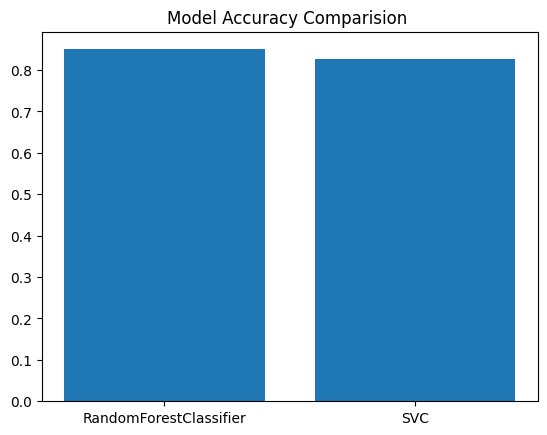

In [53]:
plt.bar(cv_df.model_name, cv_df.accuracies)
plt.title('Model Accuracy Comparision ')